In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import nltk
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
# Load conversations from a text file
file_path = "outputFinal.txt"
faqs = []
with open(file_path, "r", encoding="utf-8") as file:
    qa_text = file.read()
    qa_pairs = qa_text.split("<Q>")
    for pair in qa_pairs[1:]:
        if pair.strip():
            q, rest = pair.split("</Q>", 1)
            a = rest.split("<A>")[1].split("</A>")[0]
            faqs.append((q.strip(), a.strip()))

88715


In [ ]:
ques_data = [q for q, _ in faqs]
ans_data = [a for _, a in faqs]


In [ ]:
nltk.download('punkt')
ques_tokenized=[]
for question in ques_data:
    tokenized=word_tokenize(question)
    ques_tokenized.append(tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
ques_lemmatized=[]
for i in range(len(ques_tokenized)):
        tokens = ques_tokenized[i]
        pos_tags = nltk.pos_tag(tokens)
        lemmas = []
        for k in range(len(pos_tags)):
            tag = pos_tags[k][1][0].lower() if pos_tags[k][1][0].lower() in ['a', 'n', 'v'] else 'n'
            lemmas.append(lemmatizer.lemmatize(pos_tags[k][0], tag))
        ques_lemmatized.append(lemmas)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
ques_lemmatized_arr=[]
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join (w)for w in ques_lemmatized])
ques_lemmatized_arr = tokenizer.texts_to_sequences([' '.join (w)for w in ques_lemmatized])

In [ ]:
vocab_size = len(tokenizer.word_index)
label_encoder=LabelEncoder()
ans_data_label=label_encoder.fit_transform(ans_data)
ans_data_label_encoded=to_categorical(ans_data_label,num_classes=vocab_size)

In [ ]:
ques_pad_sequences = pad_sequences(ques_lemmatized_arr, maxlen=20)


In [ ]:

kerasModel = keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size + 1, output_dim=32,input_length=20),
        tf.keras.layers.LSTM(128, activation='relu'),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=32, activation='relu'),
        tf.keras.layers.Dense(vocab_size,activation='softmax')
        ])

In [ ]:
kerasModel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=kerasModel.fit(ques_pad_sequences,ans_data_label_encoded,epochs=200)

Epoch 1/200
3/3 [==============================] - 3s 40ms/step - loss: 5.3943 - accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 37ms/step - loss: 5.3907 - accuracy: 0.0110
Epoch 3/200
3/3 [==============================] - 0s 35ms/step - loss: 5.3871 - accuracy: 0.0110
Epoch 4/200
3/3 [==============================] - 0s 40ms/step - loss: 5.3830 - accuracy: 0.0110
Epoch 5/200
3/3 [==============================] - 0s 36ms/step - loss: 5.3769 - accuracy: 0.0110
Epoch 6/200
3/3 [==============================] - 0s 44ms/step - loss: 5.3687 - accuracy: 0.0110
Epoch 7/200
3/3 [==============================] - 0s 34ms/step - loss: 5.3503 - accuracy: 0.0110
Epoch 8/200
3/3 [==============================] - 0s 39ms/step - loss: 5.2929 - accuracy: 0.0110
Epoch 9/200
3/3 [==============================] - 0s 34ms/step - loss: 5.1732 - accuracy: 0.0110
Epoch 10/200
3/3 [==============================] - 0s 37ms/step - loss: 5.0758 - accuracy: 0.0110
Epoch 11/200
3/

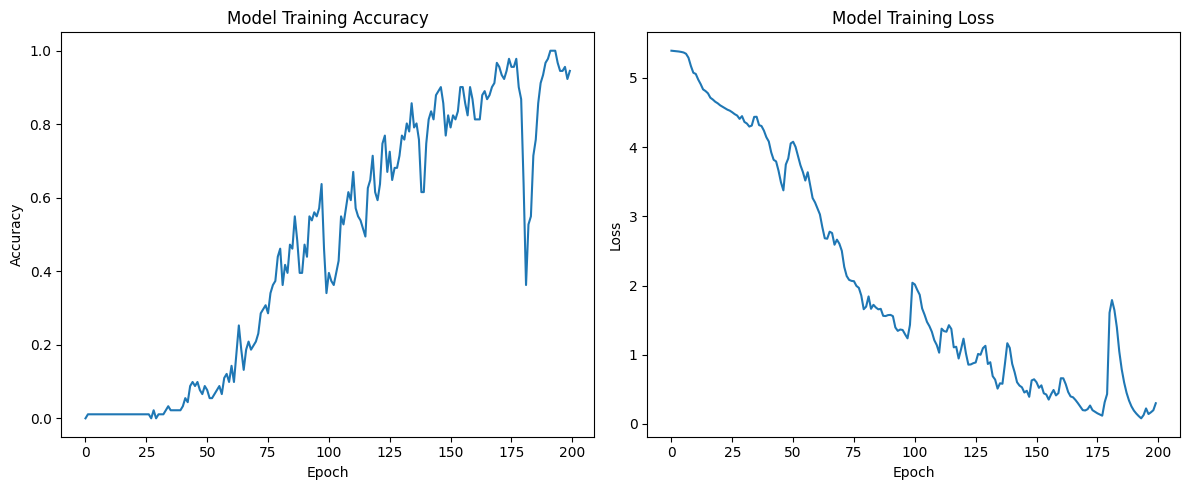

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

fig = plt.gcf()
fig.set_size_inches(12, 5)

plt.tight_layout()
plt.show()

In [ ]:
val_loss, val_acc = kerasModel.evaluate(ques_pad_sequences, ans_data_label_encoded)
print(f"{val_loss:.3f}")
print(f"{val_acc:.3f}")

3/3 [==============================] - 0s 13ms/step - loss: 0.1489 - accuracy: 0.9670
0.149
0.967


In [ ]:
def preprocess_input(input_text):
    input_text = input_text.lower()
    input_text = nltk.word_tokenize(input_text)
    input_text = [lemmatizer.lemmatize(word) for word in input_text]
    input_text = tokenizer.texts_to_sequences([input_text])
    input_text = tf.keras.preprocessing.sequence.pad_sequences(input_text, maxlen=20)
    return input_text



In [ ]:
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        break

    preprocessed_input = preprocess_input(user_input)
    prediction = kerasModel.predict(preprocessed_input)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    print("Chatbot: " + predicted_label[0])

You: what is anxiety
1/1 [==============================] - 0s 31ms/step
Chatbot: primarily  antidepressants are medication prescribed by psychiatrists to relieve symptoms of depression  psychiatrists also prescribe antidepressants for relieving symptoms of different types of anxiety disorders  depending on the severity  it s also used sometimes to treat illnesses such as ocd 
before prescribing medication  the psychiatrist assesses the severity of your illness and decides whether it warrants medication or not  the psychiatrist might consider prescribing antidepressants when the symptoms experienced are 

significantly affecting the ability to function or cope with daily life and

experienced over a long period of time


KeyboardInterrupt: ignored